In [1]:
import numpy as np
import pandas as pd
from choice_theory_figures import *

Note: figures labeled 'interactive' will not actually be interactive unless they are 
created in a live Jupyter notebook. If you're viewing this as a page on the course 
static website, you'll be able to see the default figures but not change the sliders.


# Estimating Model Parameters

Let us suppose we have some observations of trips taken by Car or Bus. We will represent the utility only with travel time and travel cost. Here we have a couple of observations:

In [2]:
data2 = pd.read_csv("example-data/data2_ca.csv")
data2

,obs,mode,time,cost,chosen
0,1,bus,20,10,True
1,1,car,10,20,False
2,2,car,12,16,True
3,2,bus,21,14,False


We can plot each observation seperately, showing the chosen and unchosen alternatives.
Since there are only two alternatives for each observation, the graph is quite simple.

In [3]:
figure_two_observations(data2)

<xmle.Elem 'div' with 1 children>

In addition to the observations, these figures also include some notes about the implied utility of the two alternatives.  Specifically, for each `obs`, the utility of the `chosen` alternative needs to be better (higher) than the utility of the non-chosen alternative.


To create a model for this, we need to find a set of parameters that will allow us predict the choices: the utility of each choice should be better than that for each non-choice.  If we map a utility function onto these figures, both "better" arrows should be pointing uphill. 

Let's visualize some different fields of utility functions.

In [4]:
figure_four_fields({
    'beta time = -0.1, beta cost = -0.1': lambda t,c: t*-0.1+c*-0.1,
    'beta time = -0.1, beta cost = -0.2': lambda t,c: t*-0.1+c*-0.2,
    'beta time = -0.5, beta cost = -0.1': lambda t,c: t*-0.5+c*-0.1,
    'a couple of wavy lines': lambda t,c: -0.1*(np.sin(t)+t)+c*-0.2,
})

<xmle.Elem 'div' with 1 children>

The contour lines on these fields are "iso-utility" lines, 
defined as a series of lines where the value of time 
(i.e. the ratio between the parameters on time and cost)
are represented by the inverse of the slope.

In abstract theory, the field can take any mathematical form,
not just a flat linear representation, but in practice if the
utility field is not linear or some very rigorously refined non-linear
form, finding good parameters for the model will be difficult,
so we will assume a linear-in-parameters form.

We want to pick an set of parameters that define a field where the actually chosen 
alternatives are all uphill from the non-chosen alternatives.

Does this work?

In [5]:
figure_two_observations_on_field(beta_time=-0.18, beta_cost=-0.1)

<xmle.Elem 'div' with 1 children>

How about this?

In [6]:
figure_two_observations_on_field(beta_time=-0.01, beta_cost=-0.06)

<xmle.Elem 'div' with 1 children>

How about this?

In [7]:
figure_two_observations_on_field(beta_time=-0.1, beta_cost=-0.2)

<xmle.Elem 'div' with 1 children>

With both arrows pointing uphill, we found a set of parameters that works to explain 
these observations.

## Only differences in utility matter

This visualization is kind of busy.  We can simplify it by reducing each
observation to a single point, by mapping the differences in time and cost,
instead of the raw values.  (Hey, remember "only the differences matter"?)

Our current dataset has one row for each combination of `obs` and `mode`,
but we might find it easier to collapse the data so that there's only
one row for each `obs`.

In [8]:
data2_obs = data2.set_index(['obs','mode']).unstack()
data2_obs

time     cost     chosen       
mode  bus car  bus car    bus    car
obs                                 
1      20  10   10  20   True  False
2      21  12   14  16  False   True

Then we can compute the differences in time and cost.

In [9]:
diffs2 = pd.DataFrame({
    'timediff': data2_obs[('time','bus')] - data2_obs[('time','car')],
    'costdiff': data2_obs[('cost','bus')] - data2_obs[('cost','car')],
    'choice': np.where( data2_obs[('chosen','bus')], 'bus', 'car')
})
diffs2

,timediff,costdiff,choice
obs,,,
1,10,-10,bus
2,9,-2,car


We can plot these points against a utility field, except instead
of total utility for each alterntive we now show "net" utility between
Car and Bus.  That also means there's no
longer a representation of "uphill" to focus on, as each observation
is only a single point.  Instead, we can might look at positive and
negative values in the field.

In [10]:
figure_differences_on_field(diffs2, beta_time=-0.1, beta_cost=-0.2)

<xmle.Elem 'div' with 1 children>

This interactive figure (assuming you are in a live Jupyter notebook) 
makes it easier to explore a variety of different beta parameters.

In [11]:
interactive_differences_on_field(diffs2, beta_time=-0.1, beta_cost=-0.2)

    'data': [{'colorbar': {'len': 0.65,
                           'lenmode': 'f…

*Side note: if you want to see the Python code used to create this interactive figure using `plotly` and `ipywidgets`, check out the `choice_theory_figures.py` file.*

## Probability not utility

The color scale on this chart is "Net Utility of Car" but we're not really
interested in utility *per se*. What we're more interested in is the choices -- 
are we correctly predicting the usage of car and bus?  So let's apply
the MNL transformation to change utility into probability, which can tell
us if the model is making good predictions.

In [12]:
interactive_differences_with_probability(diffs2, beta_time=-0.1, beta_cost=-0.2)

    'data': [{'colorbar': {'len': 0.65,
                           'lenmode': 'f…

Now it's a bit clearer how we can manipulate our parameters to keep the choices correctly segregated.

What about if we have a few more data points?

In [13]:
pd.read_csv('example-data/diffs9.csv', index_col='obs')

,choice,timediff,costdiff
obs,,,
1,car,9,-7
2,bus,-8,-5
3,bus,4,-6
4,bus,-7,-2
5,car,2,0
6,bus,1,-5
7,car,-3,4
8,bus,-2,-7
9,car,5,0


Can we find a solution that correctly predicts all the data points?  This interactive
figure marks observations that are unambiguously incorrect (less than 50% probability 
assigned to the actually chosen alternative) with an "X" and
observations that are definitely correct (greater than 95% probability 
assigned to the actually chosen alternative) with a dot.

In [14]:
interactive_differences_with_probability(diffs9, beta_time=-0.1, beta_cost=-0.2, correct=True)

    'data': [{'colorbar': {'len': 0.65,
                           'lenmode': 'f…

With the observations above, and our `time` and `cost` levers,
we can find a really nice solution where the model accurately predicts
every choice almost certainly.  But as we know, time and cost are not
the only two relevant features of these modes.  There's a lot of other
reasons why someone might choose one or the other.  And, generally there's a lot 
more than 9 trips we observe in our data. Inevitably, there will be some 
mixing of the data, so we can't neatly divide it with a clean line.

In [15]:
diffs19 = pd.read_csv('example-data/diffs19.csv', index_col='obs')
diffs19

,choice,timediff,costdiff
obs,,,
1,car,9,-7
2,bus,-8,-5
3,bus,4,-6
4,bus,-7,-2
5,bus,2,0
6,bus,1,-5
7,car,-3,4
8,car,-2,-7
9,car,5,0


In [16]:
interactive_differences_with_probability(diffs19, beta_time=-0.1, beta_cost=-0.2, correct=True)

    'data': [{'colorbar': {'len': 0.65,
                           'lenmode': 'f…

If our goal is to get everything right, it's hopeless.  We need to change our goal.

We could just try to maximize the total number of correct predictions, where the 
actually chosen alternative is the one with the highest modeled probability. This is
how some machine learning algorithms tackle this problem.  But it tends to be
problematic when the choices are very lopsided, with most observations choosing 
one alternative. This happens a lot in transportation planning and especially in 
mode choices.  So we'll need something to get at more subtly that just "correct" and
"incorrect".

## Likelihood

That something is called "likelihood".  We can assign a likelihood to each observation,
which is the modeled probability that the choice is the actually observed choice. So, 
first we compute the probability of choosing each alternative.

In [17]:
def compute_prob_car(timediff, costdiff):
    beta_time = -0.1
    beta_cost = -0.2
    return 1/(1+np.exp(
        timediff * beta_time 
        + costdiff * beta_cost
    ))

p_car = compute_prob_car(diffs19.timediff, diffs19.costdiff)
p_car

obs
1     0.377541
2     0.141851
3     0.310026
4     0.249740
5     0.549834
6     0.289050
7     0.622459
8     0.167982
9     0.622459
10    0.377541
11    0.354344
12    0.249740
13    0.214165
14    0.249740
15    0.524979
16    0.141851
17    0.622459
18    0.182426
19    0.710950
dtype: float64

In [18]:
p_bus = 1-p_car
p_bus

obs
1     0.622459
2     0.858149
3     0.689974
4     0.750260
5     0.450166
6     0.710950
7     0.377541
8     0.832018
9     0.377541
10    0.622459
11    0.645656
12    0.750260
13    0.785835
14    0.750260
15    0.475021
16    0.858149
17    0.377541
18    0.817574
19    0.289050
dtype: float64

Then we pick for each row the probability of the actually chosen alternative.

In [19]:
current_likelihood = np.where(diffs19['choice'] == 'car', p_car, p_bus)
current_likelihood

array([0.37754067, 0.85814894, 0.68997448, 0.75026011, 0.450166  ,
       0.7109495 , 0.62245933, 0.16798161, 0.62245933, 0.37754067,
       0.35434369, 0.24973989, 0.21416502, 0.75026011, 0.52497919,
       0.85814894, 0.62245933, 0.18242552, 0.7109495 ])

Then we want to find the joint likelihood of getting all these observations.
Each observation is considered to be independent from the others, so
the total likelihood is the cumulative product of all those individual likelihoods.

In [20]:
current_likelihood.prod()

6.820925494144253e-07

That's a tiny number.  Let's take the log of it.

In [21]:
np.log(current_likelihood.prod())

-14.19810048535606

Or instead of taking the product then the log, we can take the log first, then the sum:

In [22]:
np.log(current_likelihood).sum()

-14.198100485356058

You might notice there's a teeny tiny difference in the two results, that arises because of the computer's numerical precision.  That tiny error isn't a big deal for this tiny data set, but as the data set gets bigger the errors compound. Plus, as the dataset gets bigger, the total likelihood shrinks exponentially,
such that it will very quickly become too small a number to store in a 64-bit floating point value.  (The smallest 64-bit number a computer can process is only about 4.94e-324.) 
The total *log* likelihood, on the other hand, decreases only linearly with the number of observations. Thus, we'll be able to easily manange the total log likelihood for any size data set you'll ever encounter.

## Maximum likelihood

What we've done so far is to calculate a one-off log likelihood, for 
a particular set of beta parameters.  But our reason for finding the 
likelihood is to be able to compare different possible sets of beta 
parameter values, and determine which parameters are better.  Ultimately,
we want to find the value of the beta parameters to get the best, 
maximum likelihood result. Or (equivalently) the maximum log likelihood, 
because `log` is a monotonic transformation. To do this, we need to turn 
the likelihood into a function instead of a one-time computation.  

In [23]:
def likely(betas):
    pr_car = 1/(1+np.exp(
        diffs19.timediff * betas[0] 
        + diffs19.costdiff * betas[1]
    ))
    pr_bus = 1-pr_car
    likelihood = (
        (diffs19['choice'] == 'car') * pr_car 
        + (diffs19['choice'] == 'bus') * pr_bus
    )
    return np.log(likelihood).sum()

You might notice our likelihood function takes the beta
parameters as function arguments, holding the dataset fixed, while our earlier
probability function took the dataset as an argument, and held the parameters fixed.
Formally:
    
- Probability is the chance of getting an outcome as a function of the data, 
  given a model and its parameters: $P_i(X | \beta)$

- Likelihood is the chance of getting an outcome as a function of the model 
  parameters, given the data: $L_i(\beta | X)$
  
Having written up this function, we can now use it to get the log likelihood
for any particular beta parameters, like this:

In [24]:
likely([-0.1, -0.2])

-14.198100485356058

Now, with this function, we can explore different values of the beta parameters,
and try to find the maximum likelihood parameters.

In [25]:
interactive_differences_with_probability(diffs19, beta_time=-0.1, beta_cost=-0.1, loglikelihood=True)

    'data': [{'colorbar': {'len': 0.65,
                           'lenmode': 'f…

A few moments of playing with these levers should let you figure out that setting
either parameter too far in either direction is bad for the log likelihood, and the
highest values are in-between.  This is good, as it will let us hone in on a finite
"best" solution.

To help us visualize the likelihood for our simple example data with time and cost,
we can compute the log likelihood for many different beta parameters values, and
plot those results on a different figure.

In [26]:
figure_log_likelihood(likely)

<xmle.Elem 'div' with 1 children>

The maximum likelihood is found at the peak of this hill.  Finding that peak by brute force (i.e. plotting this whole figure) is a wildly inefficient way of finding the maximum likelihood, so we don't generally do this.  Instead, some algorithm is used to systematically converge to this point.  The result is sometimes labeled as the "log likelihood at convergence".  We'll see one such algorithm in a moment.

But, it is useful to see this visually in this simple two dimensional example to conceptualize the process.  And it highlights another convenient mathematical features of using the MNL model with a linear-in-parameters utility function: the log likelihood function can be proven to be globally concave, meaning that there is always one and only one set of parameters that will maximize it, and they can be found by moving uphill from any point until the the top is found.

There are a lot of different tools and algoritms that can help us find the maximum likelihood, or for that matter the maximum or minimum of any arbitrary Python function.  One of the simplest tools is the `fmin` function in the `scipy.optimize` package.  



In [27]:
from scipy.optimize import fmin

There's no `fmax`, so we need to take the negative of log likelihood to turn our maximization problem into a minimization one.

In [28]:
negative_likely = lambda b: -likely(b)

One nifty feature of the `fmin` function is the ability to attach a "callback".
This is an extra function that gets called with the current position at the 
end of each search iteration. It can allow us to monitor the current state
of the algoritm, or store and later trace the trajectory followed by the 
algorithm to find the optimum.

In [29]:
trajectory = []

In [30]:
best = fmin(
    func=negative_likely, 
    x0=[-0.1, -0.2],
    callback=trajectory.append,
)
best

Optimization terminated successfully.
         Current function value: 11.933198
         Iterations: 33
         Function evaluations: 63


array([-0.14138137, -0.01490777])

Now we can look at what the `fmin` function did: 

In [31]:
figure_log_likelihood(likely, trajectory)

<xmle.Elem 'div' with 1 children>

Having found the maximum likelihood parameters, we can punch them in to 
our previous figure and see what the result looks like.

In [32]:
interactive_differences_with_probability(diffs19, beta_time=best[0], beta_cost=best[1], loglikelihood=True)

    'data': [{'colorbar': {'len': 0.65,
                           'lenmode': 'f…

## Alternative specific constants

One interesting feature of the model so far is that the 50% iso-probability contour passes 
exactly through the origin at (0,0).  This isn't coincidental, it's a definite outcome
from the fact that the utility is a function only of cost and time, and nothing else.
If the cost difference is zero and the time difference is zero, then the modeled utility
difference of the two alternatives is exactly zero regardless of what value the beta parameters
are set.  We can fix this by adding an alternative specific constant to the utility function.


In [33]:
def likely_2(betas):
    pr_car = 1/(1+np.exp(
        diffs19.timediff * betas[0] 
        + diffs19.costdiff * betas[1] 
        + betas[2]
    ))
    pr_bus = 1-pr_car
    likelihood = (
        (diffs19['choice'] == 'car') * pr_car 
        + (diffs19['choice'] == 'bus') * pr_bus
    )
    return -np.log(likelihood).sum() # put the negative right here for convenience

We can add the new parameter to our interactive figure, and see if we
can get a better log likelihood.

In [34]:
interactive_differences_with_probability(
    diffs19, beta_time=best[0], beta_cost=best[1], beta_bus=0, loglikelihood=True
)

    'data': [{'colorbar': {'len': 0.65,
                           'lenmode': 'f…

Looks like we can.  We can use the optimization algorithm again to 
find the best values now for our 3 parameter model.

In [35]:
trajectory_2 = []
best_2 = fmin(likely_2, [best[0], best[1], 0], callback=trajectory_2.append)
best_2

Optimization terminated successfully.
         Current function value: 10.500495
         Iterations: 88
         Function evaluations: 158


array([-0.18669246, -0.16808146, -1.18576952])

We can relatively easily put this converged solution back into our 
interactive visualizer for this model.

In [36]:
interactive_differences_with_probability(
    diffs19, beta_time=best_2[0], beta_cost=best_2[1], beta_bus=best_2[2], loglikelihood=True
)

    'data': [{'colorbar': {'len': 0.65,
                           'lenmode': 'f…

But it gets harder to plot the three-dimensional log likelihood function.
Here, we show three different two dimensional cross sections of the 
trajectory, and of the log likelihood function at the converged solution.

In [37]:
figure_log_likelihood_3d(likely_2, trajectory_2)

<xmle.Elem 'div' with 1 children>

## Standard error of the estimate

You might be familiar with seeing "standard errors" on parameter estimates.  These 
standard errors are a result of the shape of this likelihood function at the 
converged solution (i.e., a the peak of the hill).

- If the shape of the hill is very pointy, and likelihood drops very quickly as we move away from the maximum, that tells us that the standard error of the estimate is small -- we are very confident that the true value of the estimator is very close to that peak.  

- If, on the other hand, the top of the hill is relatively flat, and likelihood drops very slowly as we move away from the maximum, that tells us that the standard error of the estimate is large -- we are not confident that the true value of the estimator is very close to that peak.  

- The hill can be peaked or flat by different amounts in different dimensions.

In mathematical terms, the standard error of the estimate is the inverse of the 2nd derivative of the log likelihood with respect to the parameters.  Tools build specifically for discrete choice model estimation will be able to calculate this second derivative for you in an efficient manner.  But seeing as we're
walking through this example to demonstrate how to do this in Python, let's do it manually here. 

In normal usage, as we're seen, we can easily write functions using Python, numpy, and pandas,
to compute the log likelihood.  We could do a bunch of math to analytically derive the 
mathematical form of the derivatives (it's not *too* hard for the MNL model) but with 
modern tools we don't need to do all that work.  Instead, in order to get the *derivatives* of the function, we'll 
use one more library: `autograd`.  This is a tool that allows for the automatic
differentiation of functions.  It's not quite as easy-to-use as pandas, but with just a few tweaks
we can get both the first and second derivatives of the log likelihood function.

In [38]:
from autograd import grad, hessian
import autograd.numpy as anp

In [39]:
# autograd doesn't play nicely with pandas, so 
# we'll make all our data into numpy arrays.
choose_car = (diffs19['choice'] == 'car').to_numpy()
choose_bus = (diffs19['choice'] == 'bus').to_numpy()
timediff = diffs19.timediff.to_numpy()
costdiff = diffs19.costdiff.to_numpy()

In [40]:
def likely_2a(betas):
    pr_car = 1/(1+anp.exp(timediff * betas[0] + costdiff * betas[1] + betas[2]))
    pr_bus = 1-pr_car
    likelihood = choose_car * pr_car + choose_bus * pr_bus
    return -anp.log(likelihood).sum()

In [41]:
d_likely_2 = grad(likely_2a)
d2_likely_2 = hessian(likely_2a)

Now we can compute the gradient and hessian of the log likelihood function at any point.

In [42]:
g = d_likely_2(best_2)
g

array([-1.05492887e-04, -8.31110820e-04,  6.47935983e-05])

In [43]:
h = d2_likely_2(best_2)
h

array([[ 99.92733154, -15.58794645,  -2.90039936],
       [-15.58794645, 100.41639416, -12.88292984],
       [ -2.90039936, -12.88292984,   3.53169147]])

The standard errors are computed from the square roots of the diagonal elements of the inverse of the hessian.  

In [44]:
from scipy.linalg import inv
std_errs = np.sqrt(np.diag(inv(d2_likely_2(best_2))))
std_errs

array([0.10863964, 0.14680194, 0.78263367])

In [45]:
var_cov = inv(d2_likely_2(best_2))
var_cov

array([[0.01180257, 0.00578134, 0.03078205],
       [0.00578134, 0.02155081, 0.08336112],
       [0.03078205, 0.08336112, 0.61251547]])

## Goodness of Fit

The log likelihood achieved at the converged values, $LL(\hat\beta)$ can be used to generate an overall measure of the "goodness of fit" of a discrete choice model.  We can compare the log likelihood against better and worse models to create the measure.

The "best" possible model in this case is clearly well defined, as it would accurately predict every observation with certainty every time, yielding a likelihood of 1.0, and a log likelihood of zero.

The "worst" model is tricky, as we cannot simply take a model that never predicts the correct choice.  Such a model would have a likelihood of zero, and a log likelihood of negative infinity.  But, to create such a model, we would need to have some information about the process and use that information to intentionally "get it wrong" with certainty.  Instead, we can contemplate a model that predicts every alternative as equally probable for every decision maker, using no information whatsoever to improve our predictions.  This model would have non-zero probability for every chosen alternative, and has a well defined and finite log likelihood. We'll call this model the "Null" model, and write the log likelihood of this model as $LL(\emptyset)$.

### Rho Squared

Because we use data to *maximize* the log likelihood, we are guaranteed to achive a log likelihood for a model that uses data somewhere in between these two extremes.  The goodness of fit measure $\rho^2_\emptyset$ (rho squared with respect to the null model) represents the fraction of the distance moved from the null model to the perfect model.

$$
\rho^2_\emptyset = 1-\frac{LL(\hat\beta)}{LL(\emptyset)}
$$

In [46]:
rho_sq = 1-(likely_2(best_2)/likely_2(np.zeros_like(best_2)))
rho_sq

0.20268359004349712

However, especially for mode choice models, there is very often a massive imbalance between the mode 
choices.  You may find that the "drive alone" alternative is observed on well over half of all trips 
and representing it as "equally likely" against a variety of other 
alternatives results in an epicly poor model.  We can counteract this by defining a different "bad"
reference point: a model that consists only of alternative specific constants.  This model will use
no information other than the global market shares for each alternative, assigning the same relative
probability for each alterantive to all decision makers.

The goodness of fit measure $\rho^2_c$ (rho squared with respect to the constants only model) represents the fraction of the distance moved from the constants only model to the perfect model.

$$
\rho^2_c = 1-\frac{LL(\hat\beta)}{LL(c)}
$$

To get the best ASC holding the other parameters at zero, we just need to create a function that does that, and feed it to the same optimization engine as before.

In [47]:
likely_2_const = lambda asc: likely_2([0,0,asc])
params_asc = [0,0,fmin(likely_2_const, 0)]

Optimization terminated successfully.
         Current function value: 12.504090
         Iterations: 23
         Function evaluations: 46


In [48]:
rho_sq_asc = 1-(likely_2(best_2)/likely_2(params_asc))
rho_sq_asc

0.1602351703587762

### Adjusted Rho Squared

A problem with the rho squared measures is that they always improve when adding variables to the model, regardless of whether the variable is relevant or not.  

To counter this, we can adjust the value to penalize models that add parameters without improving the log likelihood enough to be worth the extra degree of freedom.  

This adjusted rho-squared is given by:

$$\bar\rho^2_\star = 1-\frac{LL(\hat\beta) - K_{\hat\beta}}{LL(\star) - K_{\star}}$$

Where $K_{\star}$ is the number of parameters in the model $\star$.  For the null model, this is zero, and for
the constants only model, it is the number of constants in the model (i.e. the number of alteratives minus one).
Similarly, in the numerator $K$ represents the number of parameters in the relevant model.  

For this adjusted rho squared, the addition of parameters does not necessarily improve the goodness of fit.

In [49]:
adj_rho_sq = 1-((likely_2(best_2)-3)/(likely_2(np.zeros_like(best_2))))
adj_rho_sq

0.43047754386807024

In [50]:
adj_rho_sq_asc = 1-((likely_2(best_2)-3)/(likely_2(params_asc)-1))
adj_rho_sq_asc

0.348014926497468

You might notice we got a huge change from the regular rho square to the adjusted version here. That happened because the dataset used here is so tiny, only 19 binary observataions.  For much larger datasets, the change from unadjusted to adjusted rho squares will be smaller.

## Hypothesis Testing

Just as for linear regression models, discrete choice models offer a number of hypothesis 
tests to compare models against each other.

### Single Parameter Tests

To test if a single parameter is significantly different from zero, we can use the $t$ statistic, similar to as it is used in simple linear regression.  For a parameter $\beta_i$, which has an estimate $\hat\beta_i$ with standard error of the estimate $s_i$,
$$
\frac{\hat\beta_i}{s_i} \sim t
$$

The degrees of freedom are formally the number of observations in the sample minus the 
number of parameters in the model, but in practice this isn't important, as the sample
size used for any transportation planning model is generally large enough that the $t$ distribution
will converge to the normal distribution.  This the critical value of $t$ for 95% confidence is about 1.96, 
and for 99% confidence it is about 2.58.

In [51]:
from scipy.stats import t

def t_test(parameter_value, std_err_est, deg_free):
    stat = parameter_value / std_err_est
    p = t(df=deg_free).sf(np.abs(stat)) * 2
    return f"{stat:.3f}, p={p:.3f}"

In [52]:
t_test(best_2[0], std_errs[0], len(diffs19)-len(best_2))

'-1.718, p=0.105'

In [53]:
t_test(best_2[1], std_errs[1], len(diffs19)-len(best_2))

'-1.145, p=0.269'

In [54]:
t_test(best_2[2], std_errs[2], len(diffs19)-len(best_2))

'-1.515, p=0.149'

### Parameter Equality Tests

It is often interesting to determine if two parameters are statistically different from one another. This test is also based on the t-statistic, but it needs to account not only for the variance in the two estimators individually but also for the covariance (correlation) between them.  If we define a null hypothesis

$$
H_0 : \beta_i = \beta_j
$$

then we can derive

$$
\frac{\hat\beta_i - \hat\beta_j}{\sqrt{s_i^2 + s_j^2 - 2s_{ij}}} \sim t
$$

A sufficiently large value of this $t$ statistic will allow us to reject the null hypothesis with high confidence.  In this case, that allows us to say that we are confident the true values of the two parameters are not the same.

In [55]:
def t_test_2(parameter_value1, parameter_value2, std_err_est1, std_err_est2, std_err_est12, deg_free):
    stat = (
        (parameter_value1-parameter_value2) / 
        np.sqrt(std_err_est1**2 + std_err_est2**2 - 2*std_err_est12)
    )
    p = t(df=deg_free).sf(np.abs(stat)) * 2
    return f"{stat:.3f}, p={p:.3f}"

In [56]:
t_test_2(
    best_2[0], best_2[1], 
    std_errs[0], std_errs[1], 
    var_cov[0,1], 
    deg_free=len(diffs19)-len(best_2)
)

'-0.126, p=0.901'

### Parameter Ratio Tests

We can use the same approach to check the ratio between two parameters.  In this case, we define a null hypothesis

$$
H_0 : \frac{\beta_i}{\beta_j} = K
$$

with the value $K$ being some fixed value. Or, equivalently

$$
H_0 : \beta_i = K\beta_j
$$

then we can derive

$$
\frac{\hat\beta_i - K\hat\beta_j}{\sqrt{s_i^2 + K^2 s_j^2 - 2Ks_{ij}}} \sim t
$$

A sufficiently large value of this $t$ statistic will allow us to reject the null hypothesis with high confidence.  In this case, that allows us to say that we are confident the ratio of the true values of the two parameters is not $K$.

In [57]:
def ratio_test_2(parameter_value1, parameter_value2, std_err_est1, std_err_est2, std_err_est12, k, deg_free):
    stat = (
        (parameter_value1-parameter_value2*k) / 
        np.sqrt(std_err_est1**2 + k**2*std_err_est2**2 - 2*k*std_err_est12)
    )
    p = t(df=deg_free).sf(np.abs(stat)) * 2
    return f"{stat:.3f}, p={p:.3f}"

In [58]:
ratio_test_2(
    best_2[0], best_2[1], 
    std_errs[0], std_errs[1], 
    var_cov[0,1], 
    k=3,
    deg_free=len(diffs19)-len(best_2)
)

'0.768, p=0.454'

### Full Model Likelihood Ratio Test

Instead of looking at the parameters individually, we can evaluate the performance of the entire model.
To do this we will us a likelihood ratio test.  This test is valid when we can construct two distinct
models that share the same structure, except one model has some restrictions placed on the parameter
values and the other does not.  These restrictions can take the form of fixing individual parameters
to specific values (commonly, to zero) or fixing pairs of parameters to have particular ratios (commonly,
one, which implies equality).

If the restricted model is the "true" model (our null hypothesis), then we would expect that the increase 
in likelihood found for the unrestricted model would be small.  If that increase in likelihood turns out 
to be sufficiently large, then we can reject the null hypothesis, and state with confidence that the 
restrictions are not valid.

Using the likelihood ratio test involves evaluating the test statistic:

$$
2\left( LL(U) - LL(R) \right) \sim \chi^2
$$

where $LL(U)$ is the log likelihood of the unrestricted model and $LL(R)$ is the log likelihood of the 
restricted model.  The $\chi^2$ (chi squared) distribution is characterized by a degrees of freedom, which 
is equal to the number of restrictions imposed.



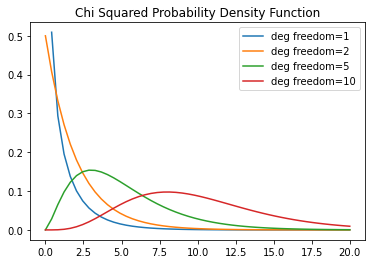

In [59]:
from scipy.stats import chi2

x = np.linspace(0,20)
for degfree in [1,2,5,10]:
    plt.plot(x,chi2.pdf(x, df=degfree), label=f'deg freedom={degfree}')
plt.title("Chi Squared Probability Density Function")
plt.legend();

To find the level of significance for rejecting a restricted model using a 
chi squared test (i.e. the probability that the likelihood ratio would be at 
least so big), use the `sf` method of the `chi2` distribution.

In [60]:
chi2(df=5).sf(7.5)

0.186029833602867

In [61]:
from scipy.stats import chi2

def likely_ratio_test(loglike_uncontrained, loglike_contrained, deg_free):
    stat = 2*(loglike_uncontrained - loglike_contrained)
    p = chi2(df=deg_free).sf(stat)
    return f"{stat:.3f}, p={p:.3f}"

In [62]:
likely_ratio_test(likely_2(best_2), likely_2(params_asc), 2)

'-4.007, p=1.000'

Oof! A negative statistic for chi-squared (ahem, *squared*) isn't right. We've forgotten that our
`likely_2` is actually returning the negative of the log likelihood.  This wasn't a problem
up to now, as the negatives cancelled out in things like rho-squared, but here they don't 
cancel, so we should fix this ourselves.

In [63]:
likely_ratio_test(-likely_2(best_2), -likely_2(params_asc), 2)

'4.007, p=0.135'

That's better.